<a href="https://colab.research.google.com/github/EngrChibest/DatacleaningUsingExcel/blob/main/DIABETES_PREDICTION_PROJECT_STARK_HEALTH_CLINIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIABETES PREDICTION PROJECT for STARK HEALTH CLINIC**

# **Importing Relavant Libraries**

In [23]:
# Importing Releveant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report, confusion_matrix, roc_auc_score
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# **Loading the Dataset**

In [24]:
# Loading data
df = pd.read_csv('diabetes_prediction_dataset.csv')

**Understand the data**

In [25]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [27]:
# describe the data
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# **Data Cleaning >>>**

Check for Missing values

In [28]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [29]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


visualising missing values

In [30]:
!pip install missingno

In [31]:
# using missingno to visualise missing values

import missingno as msn

<Axes: >

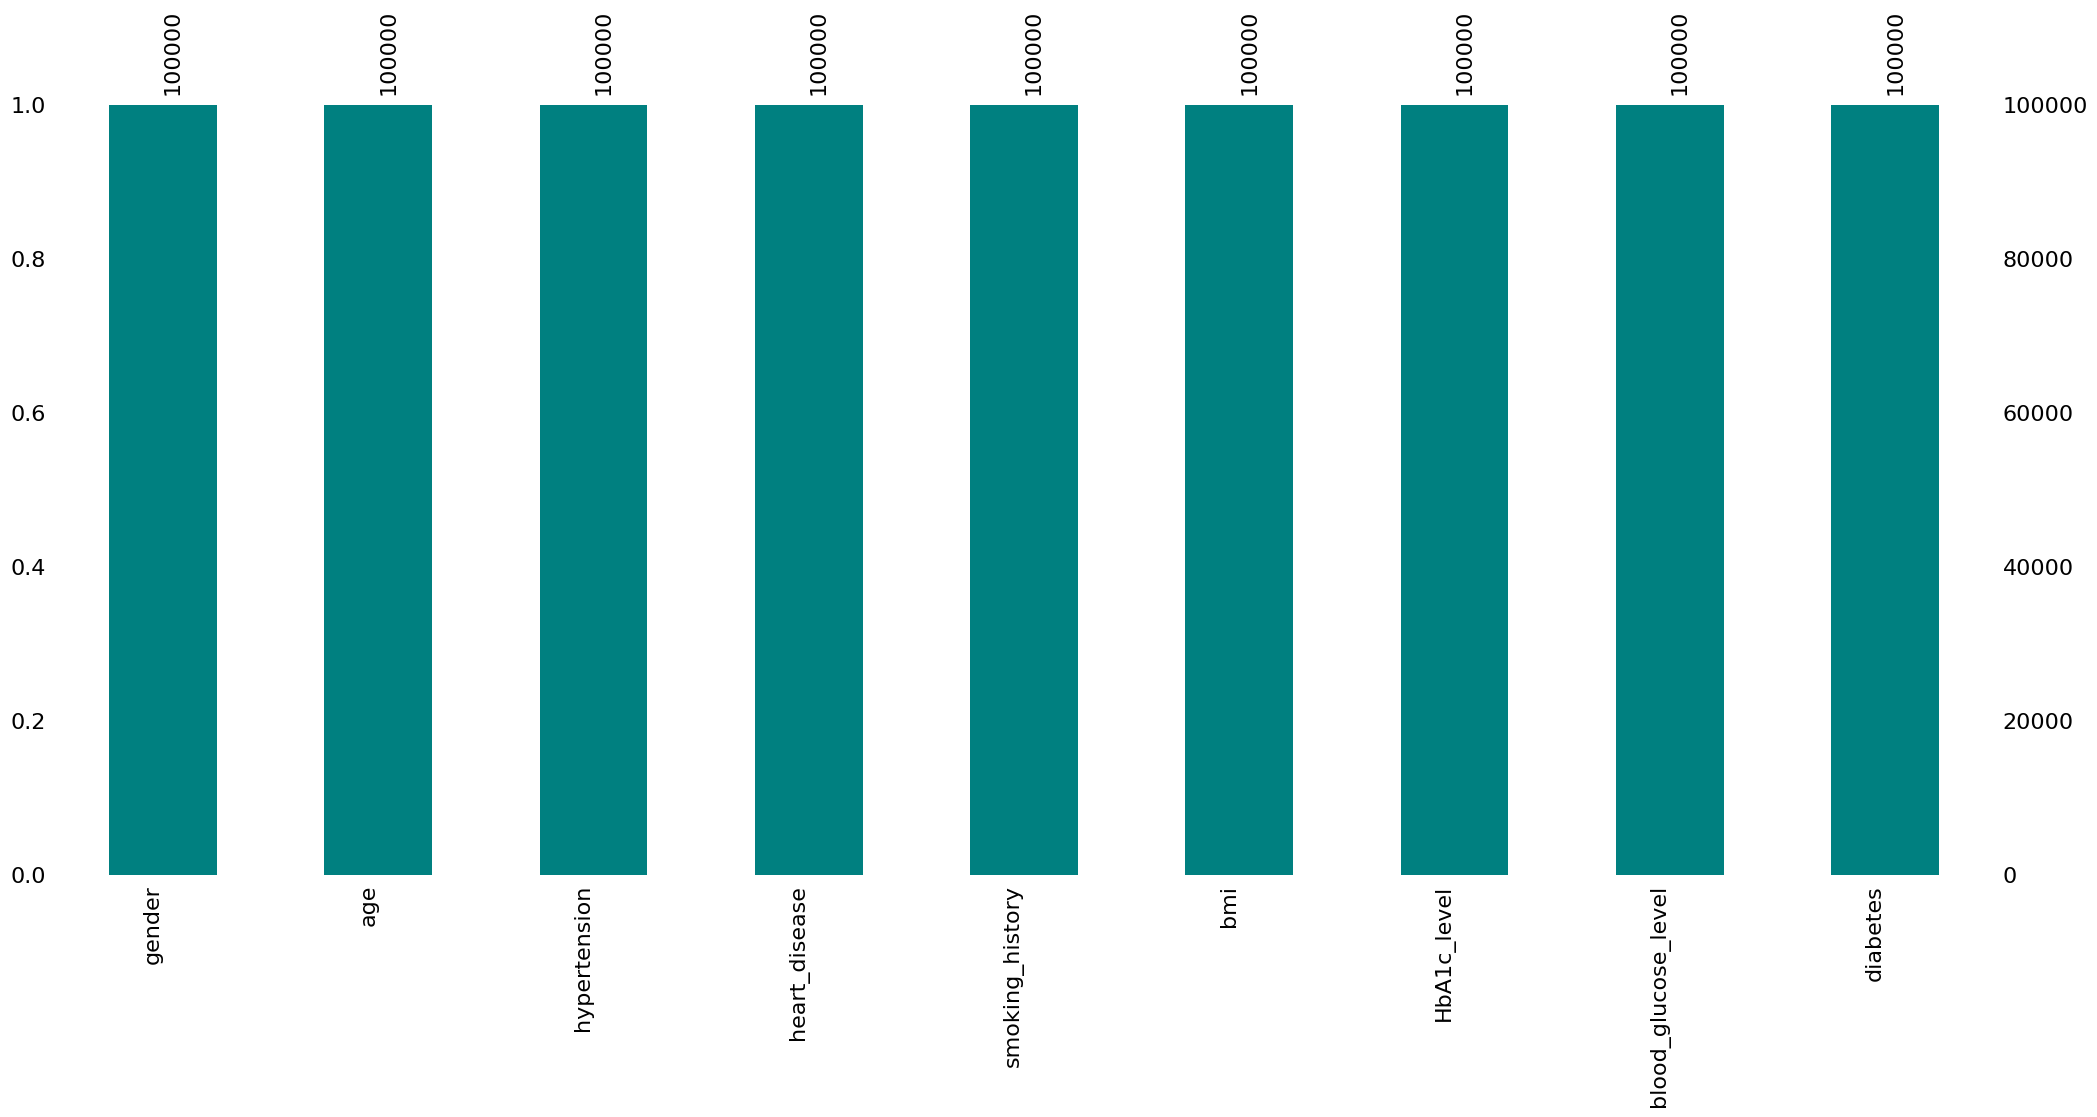

In [32]:
msn.bar(df, color="teal", label_rotation=90)

No missing values - all features/data point has the same value

**Checking for Duplicates**

In [33]:
# Checking for duplicate values in the data
df.duplicated().sum()

np.int64(3854)

3854 duplicate values found

In [34]:
df[df.duplicated]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


**Removing Duplicate values**

In [35]:
# removing duplicate values
df.drop_duplicates(inplace=True)

In [36]:
df.duplicated().sum()

np.int64(0)

No Irrelevant Columns

In [37]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Reengineering the features

In [38]:
# feature engineering on age
# Categorize age into bins
bins = [0, 17, 36, 59, 74, float('inf')]
labels = ['Young 0-17', 'Adult 18-35', 'Middle-Aged 36-58', 'Senior 59-73', 'Elderly 74 above']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df.head()



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly 74 above
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Middle-Aged 36-58
2,Male,28.0,0,0,never,27.32,5.7,158,0,Adult 18-35
3,Female,36.0,0,0,current,23.45,5.0,155,0,Middle-Aged 36-58
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly 74 above


In [39]:
# regroup the smiking_history to have never, No info and current
# let never = never and ever, former = formaer and not current, No info = No info
df['smoking_history'] = df['smoking_history'].replace(['never', 'ever'], 'never')
df['smoking_history'] = df['smoking_history'].replace(['former', 'not current'], 'former')



In [40]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly 74 above
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Middle-Aged 36-58
2,Male,28.0,0,0,never,27.32,5.7,158,0,Adult 18-35
3,Female,36.0,0,0,current,23.45,5.0,155,0,Middle-Aged 36-58
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly 74 above


### **Performing EDA**

**Key Feature EDA Visualisation**

**Univariate, Bivariate and Multivariate**

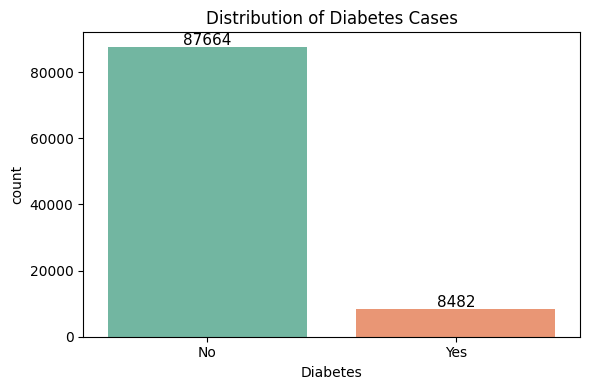

In [41]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='diabetes', palette='Set2')
plt.title("Distribution of Diabetes Cases")
plt.xlabel("Diabetes")
plt.xticks([0, 1], ['No', 'Yes'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 500, int(height), ha="center", fontsize=11)

plt.tight_layout()
plt.show()

In [90]:
# correlation of only numerical columns
numerical_columns = df.select_dtypes(include='number')

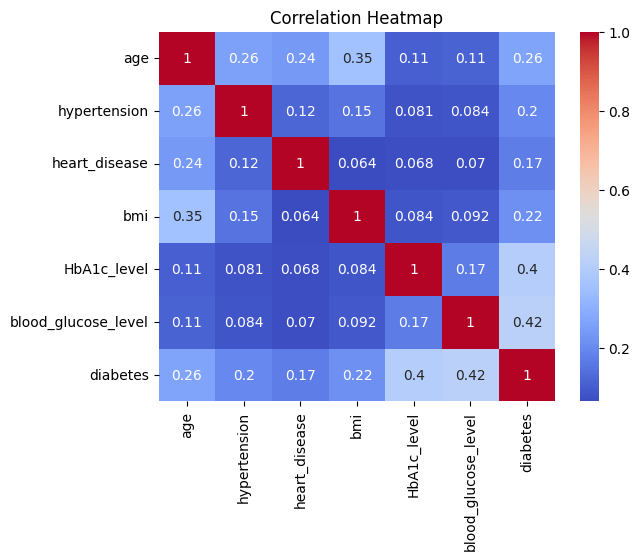

In [92]:
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

In [42]:
# Key features visualization
features = ["age_group", "bmi", "HbA1c_level", "blood_glucose_level"]
cat_features = ["gender", "smoking_history"]


EDA for Numerical features

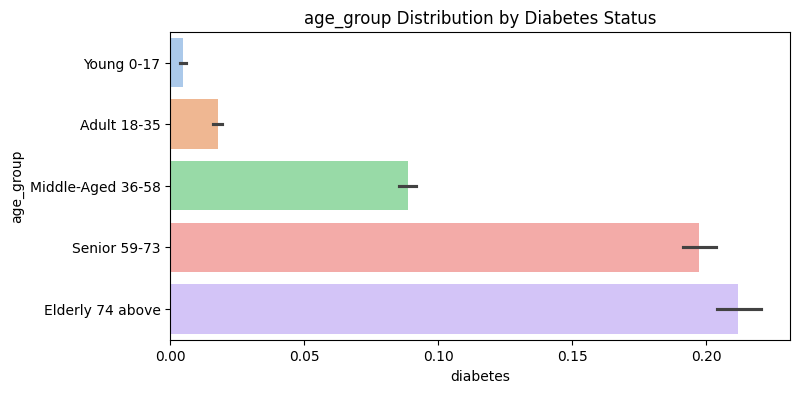

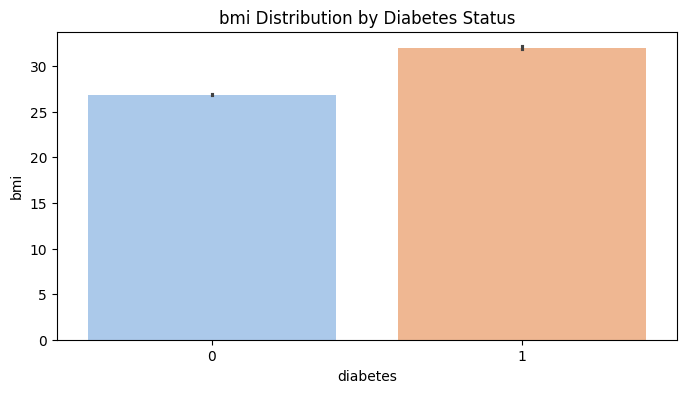

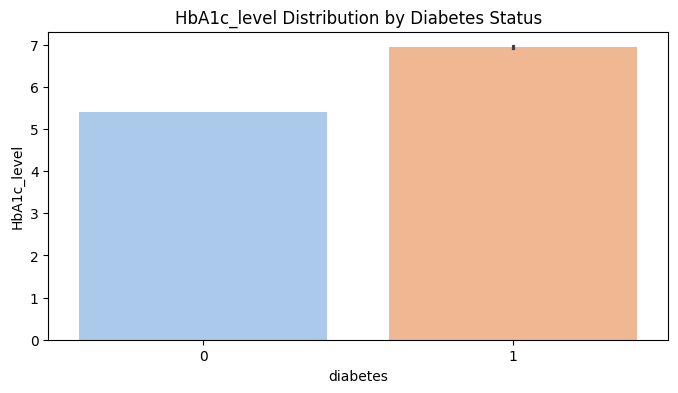

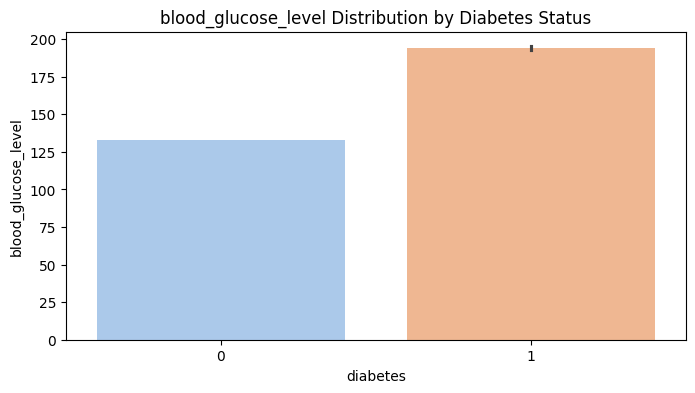

In [43]:
# bar chat visualizatios
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.barplot(x="diabetes", y=feature, data=df, palette="pastel")
    plt.title(f"{feature} Distribution by Diabetes Status")
    plt.xlabel


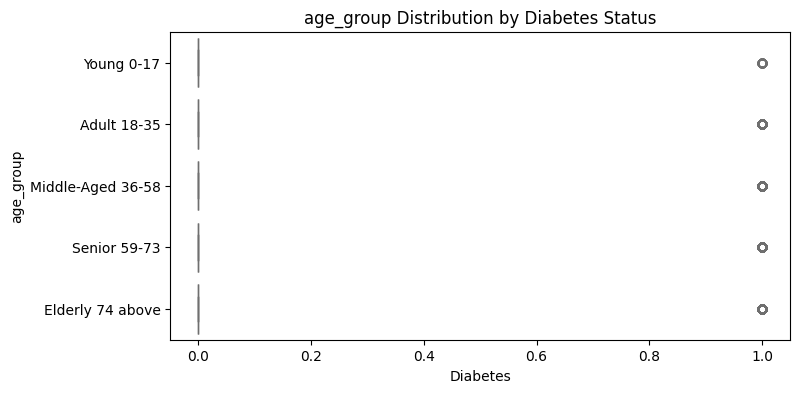

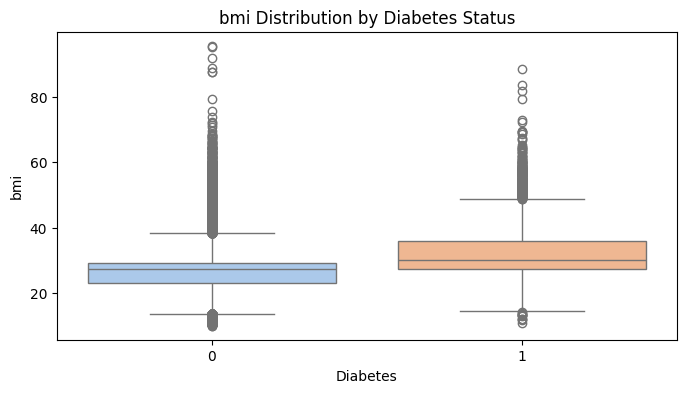

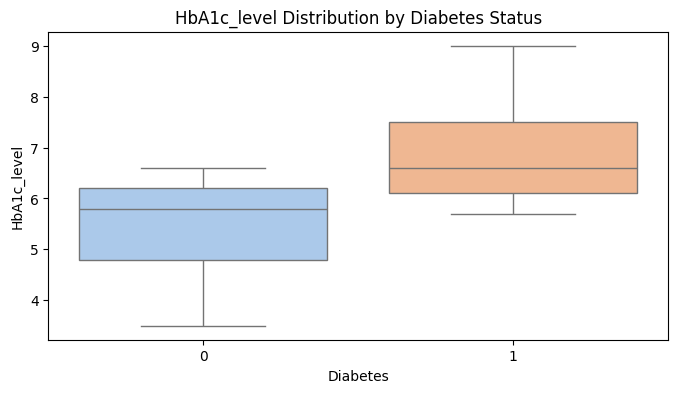

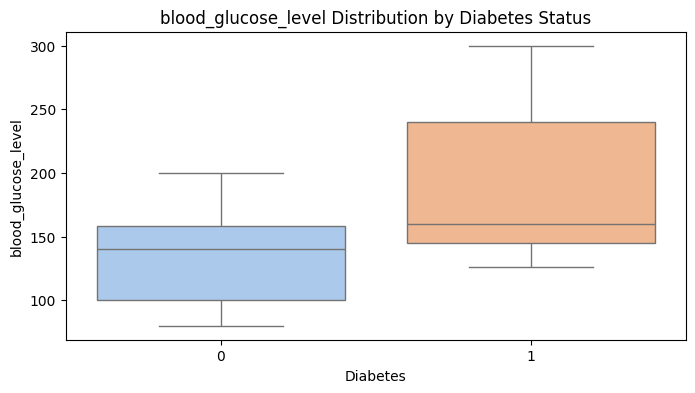

In [44]:
# boxplot visualizatios on numerical features
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="diabetes", y=feature, data=df, palette="pastel")
    plt.title(f"{feature} Distribution by Diabetes Status")
    plt.xlabel("Diabetes")

EDA for Categorical Features

Gender Distribution of Diabetes:
gender
Female    4447
Male      4035
Name: count, dtype: int64


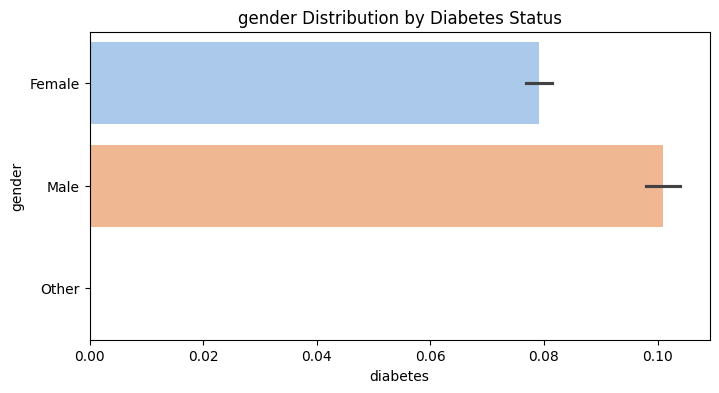

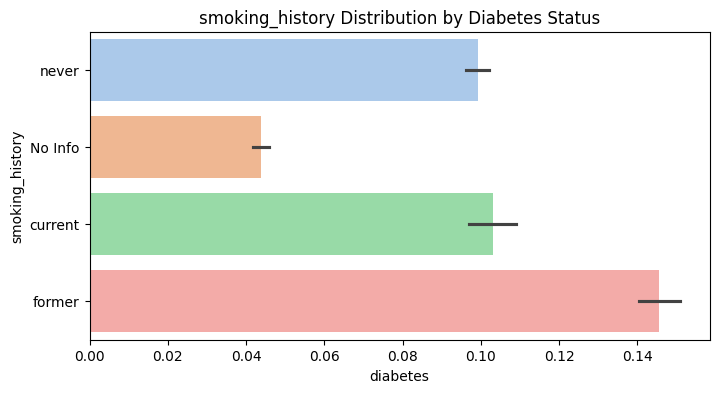

In [45]:
# bar chat visualizatios
for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(x="diabetes", y=feature, data=df, palette="pastel")
    plt.title(f"{feature} Distribution by Diabetes Status")
    plt.xlabel

# print gender distribution of diabetes
print("Gender Distribution of Diabetes:")
print(df[df["diabetes"] == 1]["gender"].value_counts())

**`Handling Outliers`**

In [46]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly 74 above
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Middle-Aged 36-58


In [47]:
bmi_q1 = df["bmi"].quantile(0.25)
bmi_q3 = df["bmi"].quantile(0.75)

hb_q1 = df["HbA1c_level"].quantile(0.25)
hb_q3 = df["HbA1c_level"].quantile(0.75)

bgl_q1 = df["blood_glucose_level"].quantile(0.25)
bgl_q3 = df["blood_glucose_level"].quantile(0.75)

In [48]:
bmi_iqr = bmi_q3 - bmi_q1
hb_iqr = hb_q3 - hb_q1
bgl_iqr = bgl_q3 - bgl_q1

bmi_lower_bound = bmi_q1 - (1.5 * bmi_iqr)
bmi_upper_bound = bmi_q3 + (1.5 * bmi_iqr)

hb_lower_bound = hb_q1 - (1.5 * hb_iqr)
hb_upper_bound = hb_q3 + (1.5 * hb_iqr)

bgl_lower_bound = bgl_q1 - (1.5 * bgl_iqr)
bgl_upper_bound = bgl_q3 + (1.5 * bgl_iqr)

In [49]:
df_cleaned = df[
    (df["bmi"] >= bmi_lower_bound) & (df["bmi"] <= bmi_upper_bound) &
    (df["HbA1c_level"] >= hb_lower_bound) & (df["HbA1c_level"] <= hb_upper_bound) &
    (df["blood_glucose_level"] >= bgl_lower_bound) & (df["blood_glucose_level"] <= bgl_upper_bound)
]

In [50]:
df_cleaned.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly 74 above
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Middle-Aged 36-58
2,Male,28.0,0,0,never,27.32,5.7,158,0,Adult 18-35
3,Female,36.0,0,0,current,23.45,5.0,155,0,Middle-Aged 36-58
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly 74 above


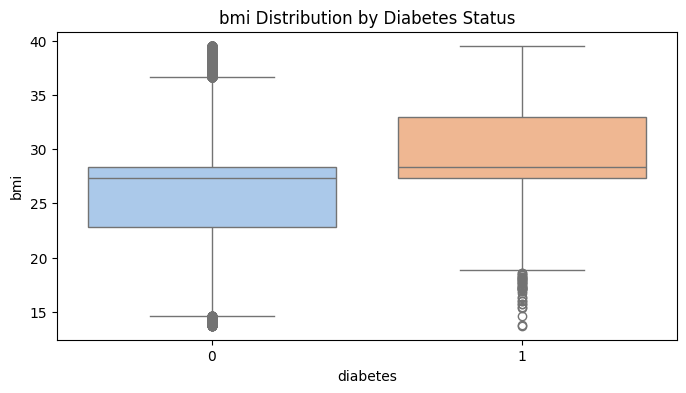

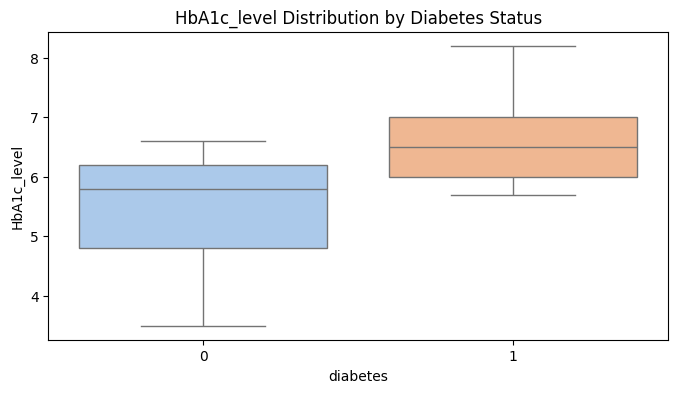

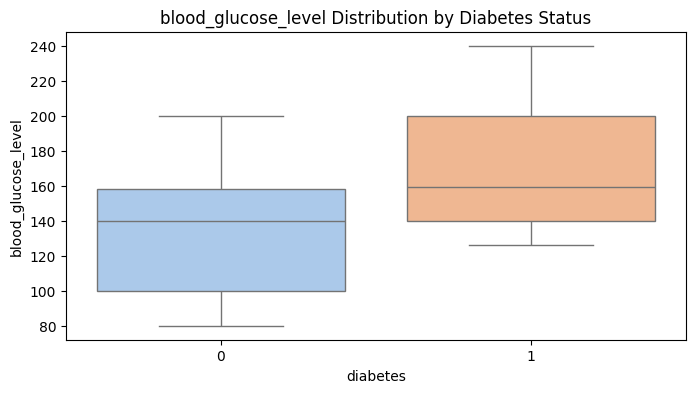

In [51]:
# boxplot visualizatios for df_cleaned data
new_features = ["bmi", "HbA1c_level", "blood_glucose_level"]
for feature in new_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="diabetes", y=feature, data=df_cleaned, palette="pastel")
    plt.title(f"{feature} Distribution by Diabetes Status")

### **Data Preprocessing**

In [52]:
df_cleaned.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly 74 above
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Middle-Aged 36-58


In [53]:
features = df_cleaned.drop(['diabetes'], axis=1)
label = df_cleaned['diabetes']


In [54]:
label.head(2)

,diabetes
0,0
1,0


In [55]:
features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,Elderly 74 above
1,Female,54.0,0,0,No Info,27.32,6.6,80,Middle-Aged 36-58


**Encoding Categorical features**

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
encoder = LabelEncoder()

In [58]:
cat_encode = df_cleaned.select_dtypes(include=['object'])
cat_encode.head()


,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [59]:
encoder.fit_transform(features["age_group"])

array([1, 2, 0, ..., 3, 0, 2])

In [60]:
features["age_group"] = encoder.fit_transform(features["age_group"])

In [61]:
for column_name in cat_encode:
    features[column_name] = encoder.fit_transform(df_cleaned[column_name])

In [62]:
features.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,age_group
0,0,80.0,0,1,3,25.19,6.6,140,1
1,0,54.0,0,0,0,27.32,6.6,80,2
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,2
4,1,76.0,1,1,1,20.14,4.8,155,1


**Spitting Data (features) into training and test**

In [63]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

**Logistic Modelling**

In [64]:
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [65]:
predictions = model.predict(x_test)

In [66]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

**Logistic Model Evaluation**

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
report = classification_report(y_test, predictions, digits=5)


In [70]:
matrix = confusion_matrix(y_test, predictions)

In [71]:
confusion_matrix(y_test, predictions)

array([[16595,   124],
       [  727,   193]])

In [72]:
print(report)

              precision    recall  f1-score   support

           0    0.95803   0.99258   0.97500     16719
           1    0.60883   0.20978   0.31205       920

    accuracy                        0.95175     17639
   macro avg    0.78343   0.60118   0.64352     17639
weighted avg    0.93982   0.95175   0.94042     17639



Text(0.5, 23.52222222222222, 'Actual Value')

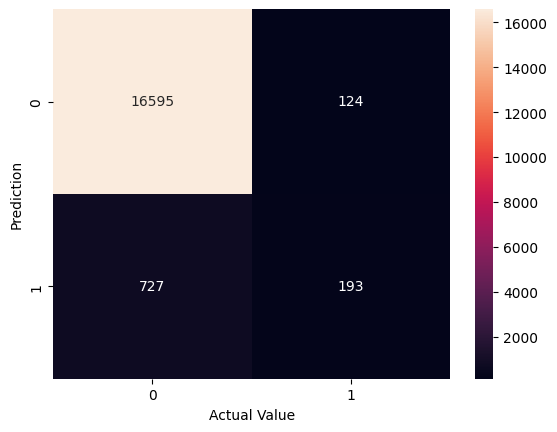

In [73]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

**Improving the Model by scaling**

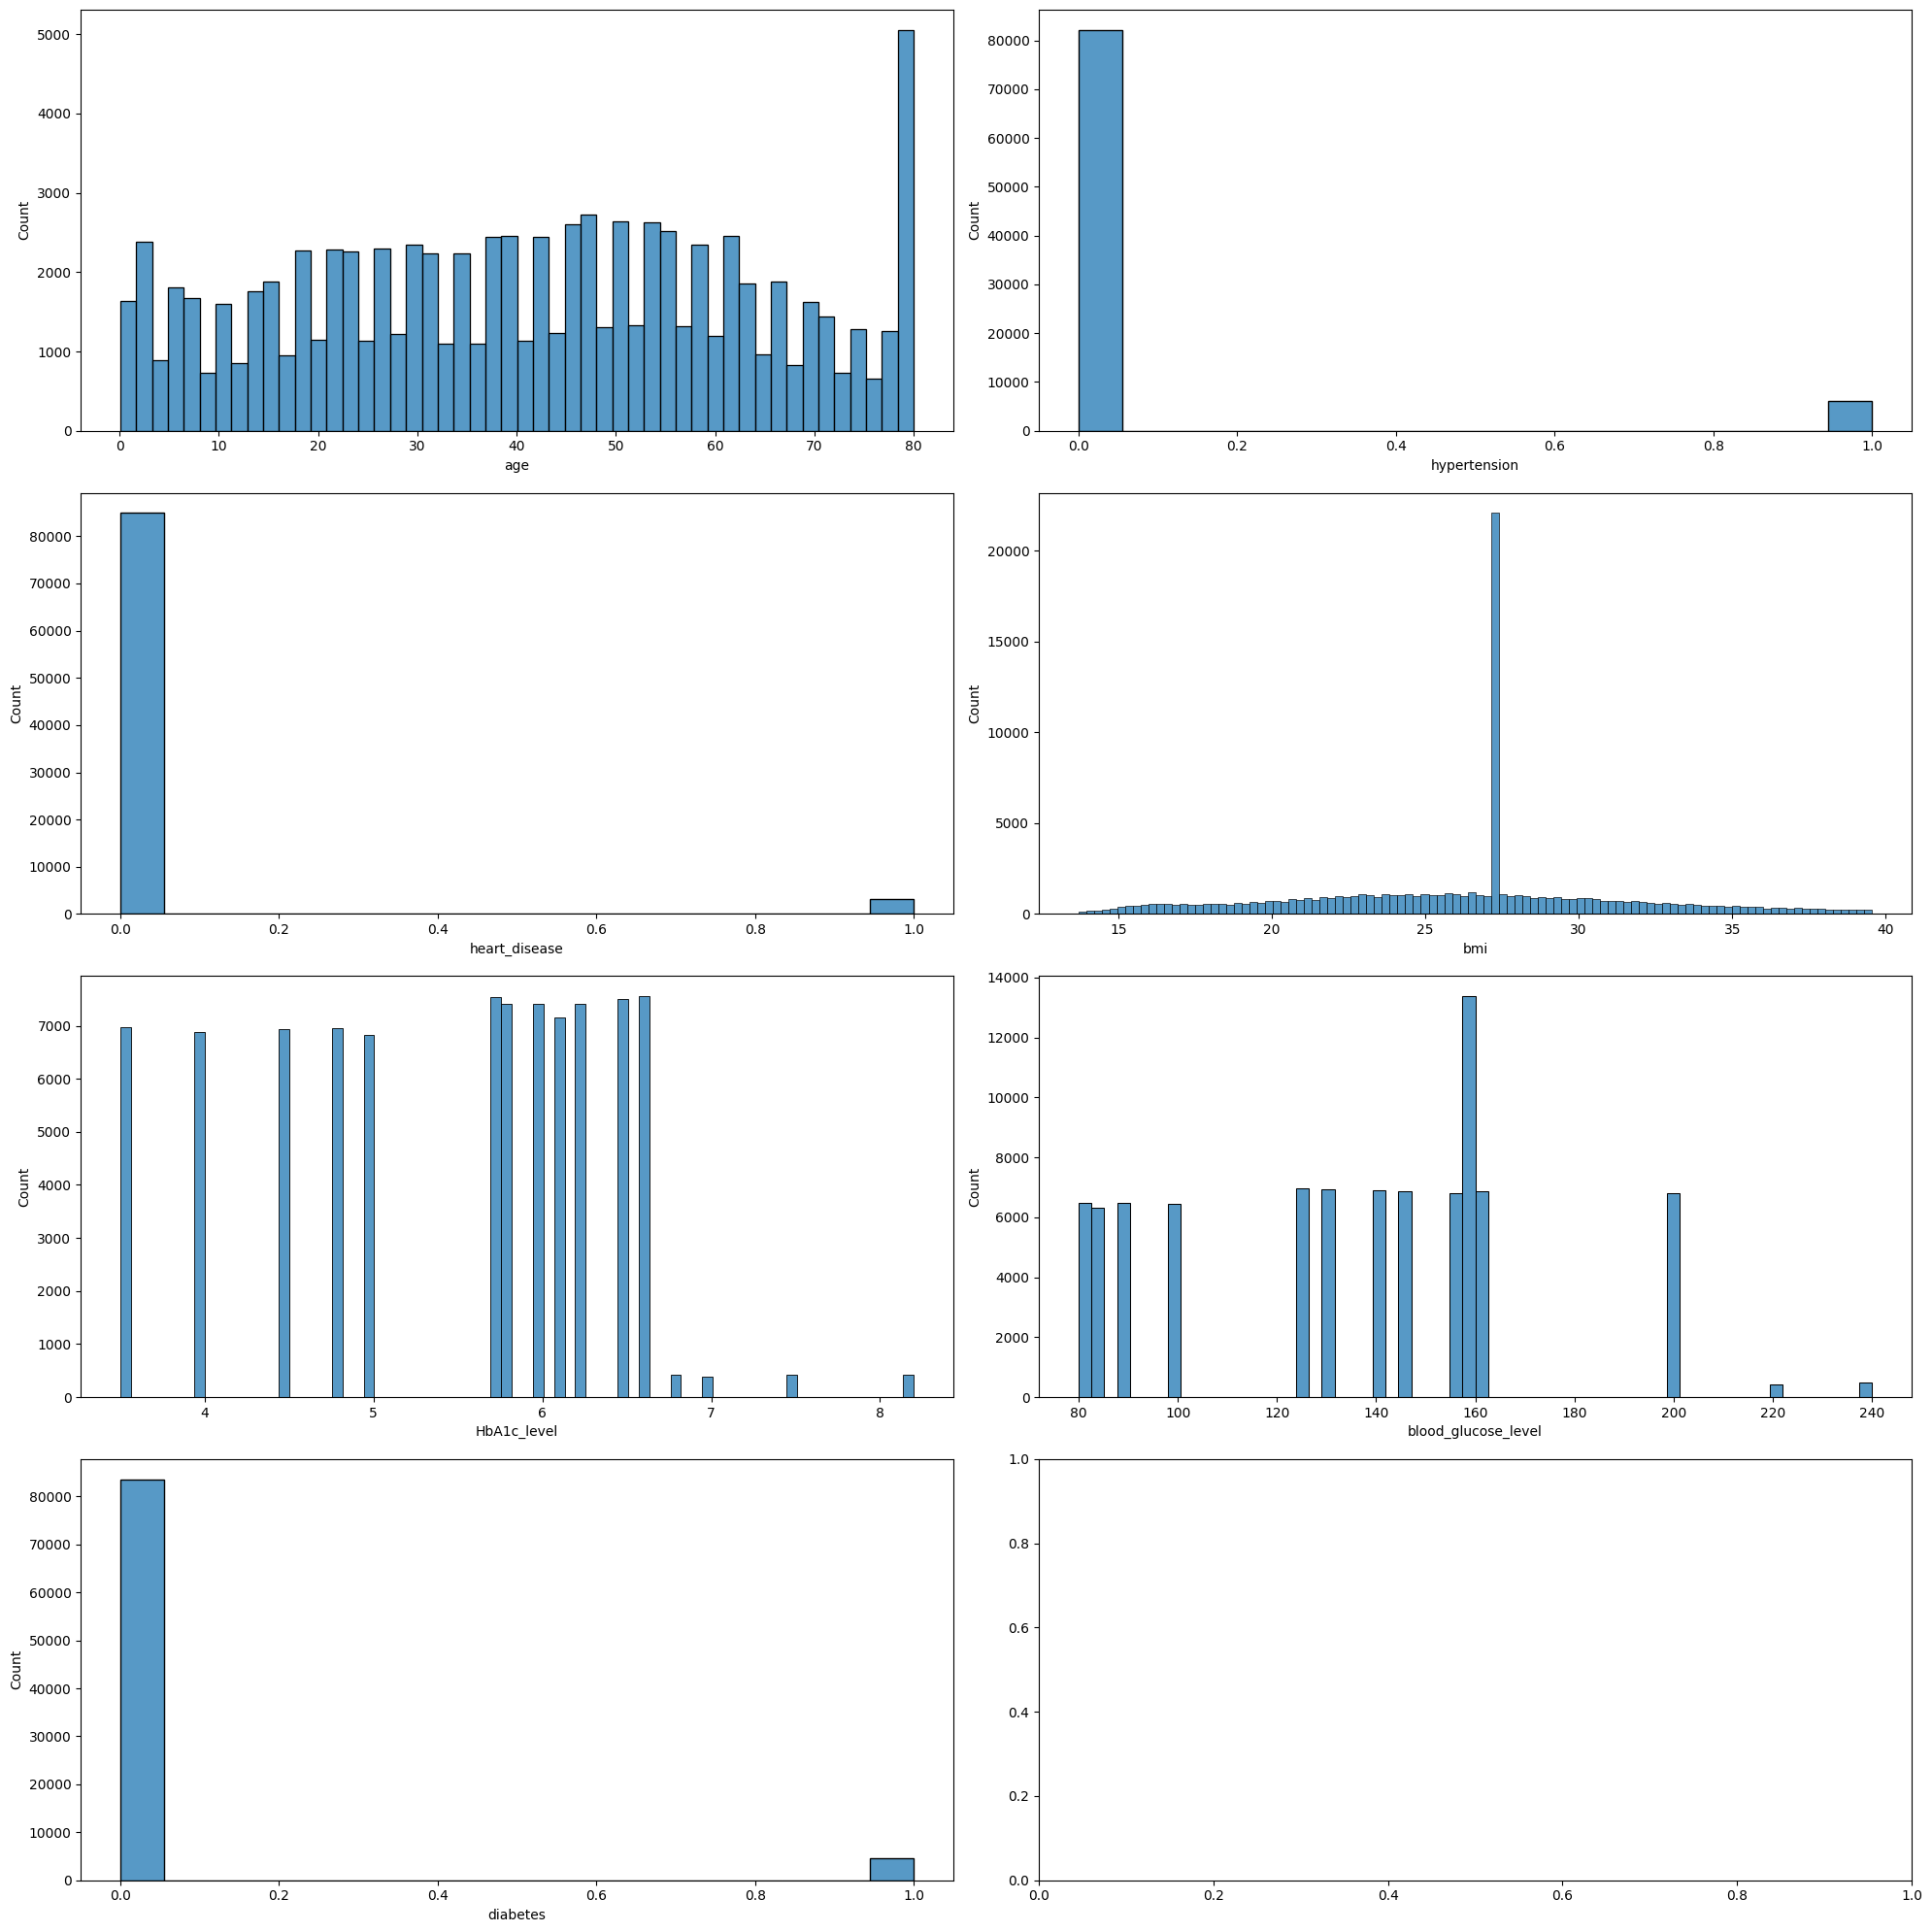

In [74]:
fig, position = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(df_cleaned.select_dtypes(include="number")):
    sns.histplot(df_cleaned[column_name], ax=position[index])

plt.tight_layout()
plt.show()

**Retraining model**

In [75]:
# scalling the values in the train and test features
from sklearn.preprocessing import StandardScaler
# scaling the values of the train and test features
scaler = StandardScaler()
x_train_scalled = scaler.fit_transform(x_train)
x_test_scalled = scaler.transform(x_test)

In [76]:
# creating an object of the data
scalled_model = LogisticRegression(random_state=42)

In [77]:
# training the model on the scaled training data
scalled_model.fit(x_train_scalled, y_train)

LogisticRegression(random_state=42)

In [78]:
# Predictions
predict = scalled_model.predict(x_test_scalled)

predict[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
y_test.values[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

**Model Re-evaluation**

In [80]:
reports = classification_report(y_test, predict, digits=5)
confusion_matrix(y_test, predict)

array([[16621,    98],
       [  569,   351]])

In [81]:
print(reports)

              precision    recall  f1-score   support

           0    0.96690   0.99414   0.98033     16719
           1    0.78174   0.38152   0.51278       920

    accuracy                        0.96219     17639
   macro avg    0.87432   0.68783   0.74656     17639
weighted avg    0.95724   0.96219   0.95594     17639



Text(0.5, 23.52222222222222, 'Actual Value')

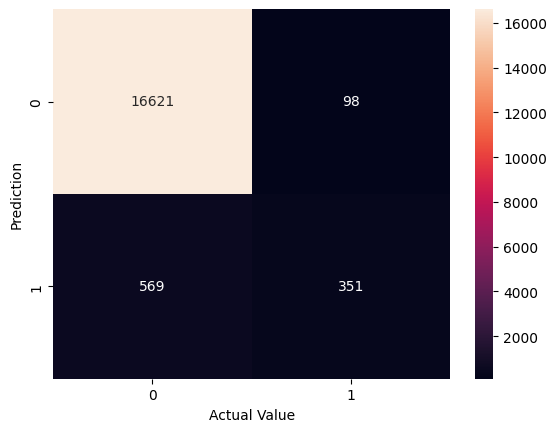

In [82]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='g')
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

**Improve the performance of the model**

              precision    recall  f1-score   support

           0    0.96690   0.99414   0.98033     16719
           1    0.78174   0.38152   0.51278       920

    accuracy                        0.96219     17639
   macro avg    0.87432   0.68783   0.74656     17639
weighted avg    0.95724   0.96219   0.95594     17639



<Axes: >

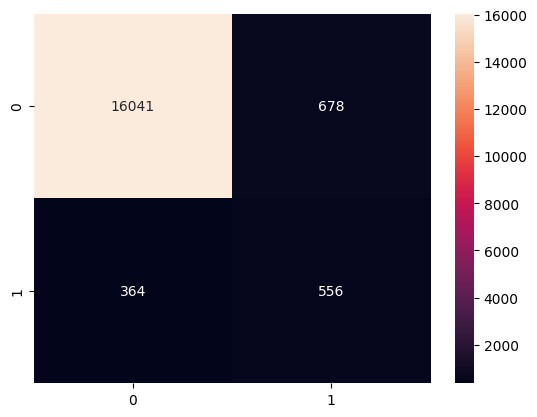

In [83]:
# giving more importance to the minority class (class: 1)
scalled_model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})
scalled_model.fit(x_train_scalled, y_train)
predictions = scalled_model.predict(x_test_scalled)
report = classification_report(y_test, predict, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')

# **Other Machine Learning Models**

Decision Tree Model


1. SGD Model
2. KNeighbors Model
3. RandomForest Model
4. Adaboost Model

In [84]:
# Importing decisionTree
from sklearn.tree import DecisionTreeClassifier
# Importing SGDClassifier
from sklearn.linear_model import SGDClassifier
# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Importing Adaboost
from sklearn.ensemble import AdaBoostClassifier

Training Logistic Regression...
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     16719
           1       0.38      0.68      0.49       920

    accuracy                           0.92     17639
   macro avg       0.68      0.81      0.72     17639
weighted avg       0.95      0.92      0.93     17639



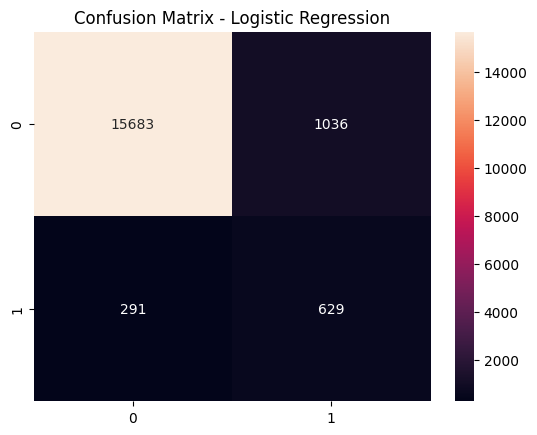

Training Decision Tree...
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     16719
           1       0.54      0.54      0.54       920

    accuracy                           0.95     17639
   macro avg       0.76      0.76      0.76     17639
weighted avg       0.95      0.95      0.95     17639



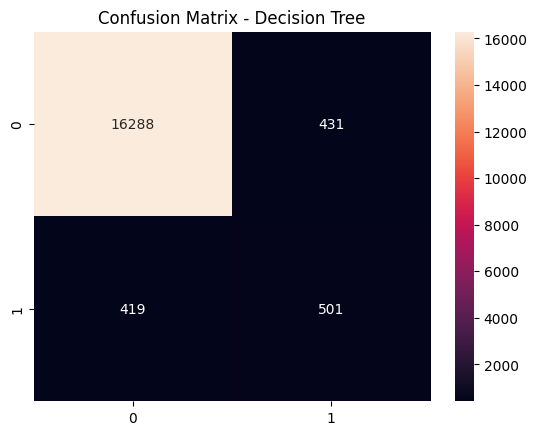

Training SGD Classifier...
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     16719
           1       0.42      0.61      0.50       920

    accuracy                           0.94     17639
   macro avg       0.70      0.78      0.73     17639
weighted avg       0.95      0.94      0.94     17639



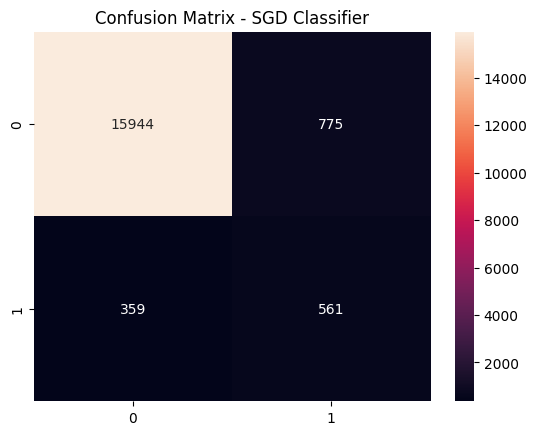

Training K-Nearest Neighbors...
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     16719
           1       0.78      0.37      0.50       920

    accuracy                           0.96     17639
   macro avg       0.87      0.68      0.74     17639
weighted avg       0.96      0.96      0.96     17639



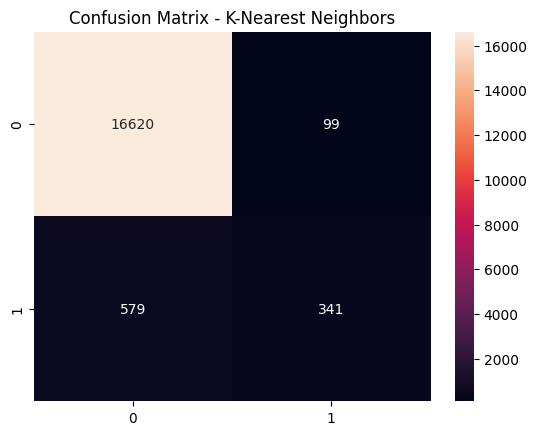

Training Random Forest...
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     16719
           1       0.89      0.48      0.62       920

    accuracy                           0.97     17639
   macro avg       0.93      0.74      0.80     17639
weighted avg       0.97      0.97      0.97     17639



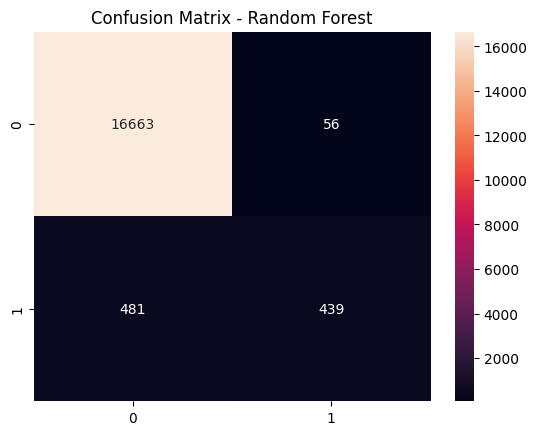

In [85]:
# Class weight
class_weight = {0:1, 1:6}

# Initialize and train the models
classifiers = [
    [LogisticRegression(random_state=42, class_weight=class_weight), 'Logistic Regression'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weight), 'Decision Tree'],
    [SGDClassifier(random_state=42, class_weight=class_weight), 'SGD Classifier'],
    [KNeighborsClassifier(), 'K-Nearest Neighbors'],
    [RandomForestClassifier(random_state=42, class_weight=class_weight), 'Random Forest']
]

for classifier in classifiers:
    model_name = classifier[1]
    scalled_model = classifier[0]
    print(f"Training {model_name}...")
    scalled_model.fit(x_train_scalled, y_train)
    predictions = scalled_model.predict(x_test_scalled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


# **Handling Outliers**

**Outliers in healthcare are often real signals, not errors:**

A blood glucose level of 300 is clinically valid in an undiagnosed diabetic.

A very low BMI or extreme HbA1c could reflect critical health issues.

**Removing these may lead to**


*   Loss of real diabetic cases (especially severe ones)
*   Bias toward “healthy-looking” patients
*   Reduced model generalizability to critical/high-risk populations


**Remedy:**
* Apply IQR filtering only to age if you want to exclude unrealistic entries (e.g., infants).
* Cap values in numeric clinical features (e.g., limit extreme BMI, glucose) at 1st and 99th percentiles.

In [86]:
# Applying IQR filtering to 'age'
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
df = df[(df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age)]

In [87]:
# Cap outliers in 'bmi', 'HbA1c_level', and 'blood_glucose_level'
for col in ['bmi', 'HbA1c_level', 'blood_glucose_level']:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower, upper=upper)

In [88]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly 74 above
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Middle-Aged 36-58
2,Male,28.0,0,0,never,27.32,5.7,158,0,Adult 18-35
3,Female,36.0,0,0,current,23.45,5.0,155,0,Middle-Aged 36-58
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly 74 above
